# Importing Libraries

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize']=15,8

# Data Understanding

In [69]:
dfd=pd.read_csv('deliveries.csv')
dfd.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [70]:
dfm=pd.read_csv('matches.csv')
dfm.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [71]:
# Checking shape and size

In [72]:
dfd.shape,dfm.shape

((179078, 21), (756, 18))

In [73]:
dfd.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [74]:
dfm.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [75]:
#checking wether total_runs is sum of batman_runs and extra_runs
dfd[(dfd.match_id==1) & (dfd.extra_runs!=0) & (dfd.batsman_runs!=0)][['batsman_runs','extra_runs','total_runs']].head(20)

,batsman_runs,extra_runs,total_runs
182,1,1,2


In [76]:
dfd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [77]:
df_so=dfd[dfd.is_super_over==1].groupby(['match_id','inning'],as_index=False)['total_runs'].sum()
df_so

,match_id,inning,total_runs
0,34,3,11
1,34,4,6
2,126,3,15
3,126,4,18
4,190,3,9
5,190,4,10
6,388,3,20
7,388,4,15
8,401,3,15
9,401,4,11


#### We conclude super overs are innings 3 and 4 for respective match


In [78]:
dfd.match_id.nunique()

756

In [79]:
dfd[dfd.is_super_over==0][['match_id']].nunique()

match_id    756
dtype: int64

#### Total number of matches played is 756
#### There are 749 matches without super over
#### There are 7 matches with super over

In [80]:
dfd[~(dfd.iloc[:,10:16].sum(axis=1)==dfd.iloc[:,17])].iloc[:,10:18]

,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs


This suggests that wide_runs+bye_runs+legbye_runs+noball_runs+penalty_runs+batsman_runs=total_runs. 



And there is no violation is such criterial through out the dataset.

In [81]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [82]:
dfm[dfm.id.isin(df_so.match_id.unique())]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
33,34,2017,Rajkot,2017-04-29,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,tie,0,Mumbai Indians,0,0,KH Pandya,Saurashtra Cricket Association Stadium,AK Chaudhary,CB Gaffaney,NaN
125,126,2009,Cape Town,2009-04-23,Rajasthan Royals,Kolkata Knight Riders,Kolkata Knight Riders,field,tie,0,Rajasthan Royals,0,0,YK Pathan,Newlands,MR Benson,M Erasmus,NaN
189,190,2010,Chennai,2010-03-21,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,tie,0,Kings XI Punjab,0,0,J Theron,"MA Chidambaram Stadium, Chepauk",K Hariharan,DJ Harper,NaN
387,388,2013,Hyderabad,2013-04-07,Royal Challengers Bangalore,Sunrisers Hyderabad,Royal Challengers Bangalore,bat,tie,0,Sunrisers Hyderabad,0,0,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",AK Chaudhary,S Ravi,NaN
400,401,2013,Bangalore,2013-04-16,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,tie,0,Royal Challengers Bangalore,0,0,V Kohli,M Chinnaswamy Stadium,M Erasmus,VA Kulkarni,NaN
475,476,2014,Abu Dhabi,2014-04-29,Rajasthan Royals,Kolkata Knight Riders,Rajasthan Royals,bat,tie,0,Rajasthan Royals,0,0,JP Faulkner,Sheikh Zayed Stadium,Aleem Dar,AK Chaudhary,NaN
535,536,2015,Ahmedabad,2015-04-21,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,tie,0,Kings XI Punjab,0,0,SE Marsh,"Sardar Patel Stadium, Motera",M Erasmus,S Ravi,NaN


#### When there is a superover, result in matches dataframe is tie, though winner of superover is correctly specified.

## Data Cleaning

In [83]:
#Checking null values and justifying it
(dfd.isnull().sum()/dfd.shape[0])*100

match_id             0.000000
inning               0.000000
batting_team         0.000000
bowling_team         0.000000
over                 0.000000
ball                 0.000000
batsman              0.000000
non_striker          0.000000
bowler               0.000000
is_super_over        0.000000
wide_runs            0.000000
bye_runs             0.000000
legbye_runs          0.000000
noball_runs          0.000000
penalty_runs         0.000000
batsman_runs         0.000000
extra_runs           0.000000
total_runs           0.000000
player_dismissed    95.066954
dismissal_kind      95.066954
fielder             96.399334
dtype: float64

In [84]:
#Checking null values
(dfm.isnull().sum()/dfm.shape[0])*100

id                  0.000000
season              0.000000
city                0.925926
date                0.000000
team1               0.000000
team2               0.000000
toss_winner         0.000000
toss_decision       0.000000
result              0.000000
dl_applied          0.000000
winner              0.529101
win_by_runs         0.000000
win_by_wickets      0.000000
player_of_match     0.529101
venue               0.000000
umpire1             0.264550
umpire2             0.264550
umpire3            84.259259
dtype: float64

In [85]:
dfm[dfm.winner.isnull()==True]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN
744,11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary


 For no result winner column is null value, which is justified.
    
    
Same for player_of_the_match

In [86]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [87]:
# date should be in datetime format
dfm.date=pd.to_datetime(dfm['date'])
dfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               756 non-null    int64         
 1   season           756 non-null    int64         
 2   city             749 non-null    object        
 3   date             756 non-null    datetime64[ns]
 4   team1            756 non-null    object        
 5   team2            756 non-null    object        
 6   toss_winner      756 non-null    object        
 7   toss_decision    756 non-null    object        
 8   result           756 non-null    object        
 9   dl_applied       756 non-null    int64         
 10  winner           752 non-null    object        
 11  win_by_runs      756 non-null    int64         
 12  win_by_wickets   756 non-null    int64         
 13  player_of_match  752 non-null    object        
 14  venue            756 non-null    object   

In [88]:
dfm.team1.value_counts()

Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Lions                   14
Rising Pune Supergiant           8
Rising Pune Supergiants          7
Kochi Tuskers Kerala             7
Delhi Capitals                   6
Name: team1, dtype: int64

#### Rising pune supergiants are mentioned two times which is same team
#### Lets replace them with the same team as dropping the record will drop the player_of_match associated with it

#### Also Delhi daredevils are renamed Delhi Capitals which comes from domain knowledge. Lets club them to Delhi Capitals
#### Deccan chargers and Sunrisers hyderabad are two different owners. So lets not club them.

In [89]:
dfm.replace({'Rising Pune Supergiant':'Rising Pune Supergiants','Delhi Daredevils':'Delhi Capitals'},inplace=True)


In [90]:
dfm.team1.value_counts()

Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Capitals                  78
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Rising Pune Supergiants         15
Gujarat Lions                   14
Kochi Tuskers Kerala             7
Name: team1, dtype: int64

In [91]:
dfd.replace({'Rising Pune Supergiant':'Rising Pune Supergiants','Delhi Daredevils':'Delhi Capitals'},inplace=True)


Umpires wont have any say for a team, if so that will be very random


Removing umpires from analysis

In [92]:

dfm.drop(dfm.iloc[:,15:].columns,1,inplace=True)
dfm.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue'],
      dtype='object')

# Data Analysis

## 1.Analysis in Matches Dataset

### Defining a function to update team based on their ranking

We will be using  **dense rank** to rank various teams as we may consider mode somewhere.

In [93]:
rq_team=dfm.team1.value_counts().drop(index=['Deccan Chargers','Kochi Tuskers Kerala','Gujarat Lions',
                 'Rising Pune Supergiants','Pune Warriors']).index
rank_df=pd.DataFrame(index=list(rq_team))
def update(data,col):
    global rank_df
    rank=data.rank(ascending=False,method='dense')
    rank_df[col]=rank
    return rank_df
    
    

### Total wins by team across seasons
 'Deccan Chargers','Kochi Tuskers Kerala','Gujarat Lions','Rising Pune Supergiants','Pune Warriors' are obsolute to our 
 analysis. So analysis is carried out without considering such teams as they are dissolved.

,Total_Wins
Mumbai Indians,1.0
Kings XI Punjab,5.0
Chennai Super Kings,2.0
Royal Challengers Bangalore,4.0
Kolkata Knight Riders,3.0
Delhi Capitals,6.0
Rajasthan Royals,7.0
Sunrisers Hyderabad,8.0


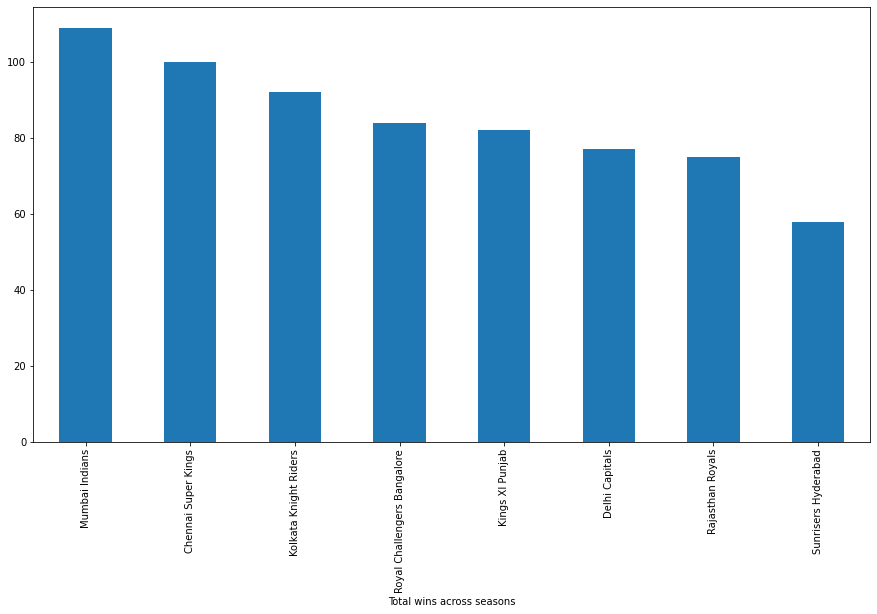

In [94]:
data=dfm.winner.value_counts().drop(index=['Deccan Chargers','Kochi Tuskers Kerala','Gujarat Lions',
                 'Rising Pune Supergiants','Pune Warriors'])
data.plot(kind='bar')

plt.xlabel('Total wins across seasons');

update(data,'Total_Wins')

###  Average wins by teams across seasons

,Total_Wins,Avg_Wins
Mumbai Indians,1.0,2.0
Kings XI Punjab,5.0,7.0
Chennai Super Kings,2.0,1.0
Royal Challengers Bangalore,4.0,6.0
Kolkata Knight Riders,3.0,4.0
Delhi Capitals,6.0,8.0
Rajasthan Royals,7.0,5.0
Sunrisers Hyderabad,8.0,3.0


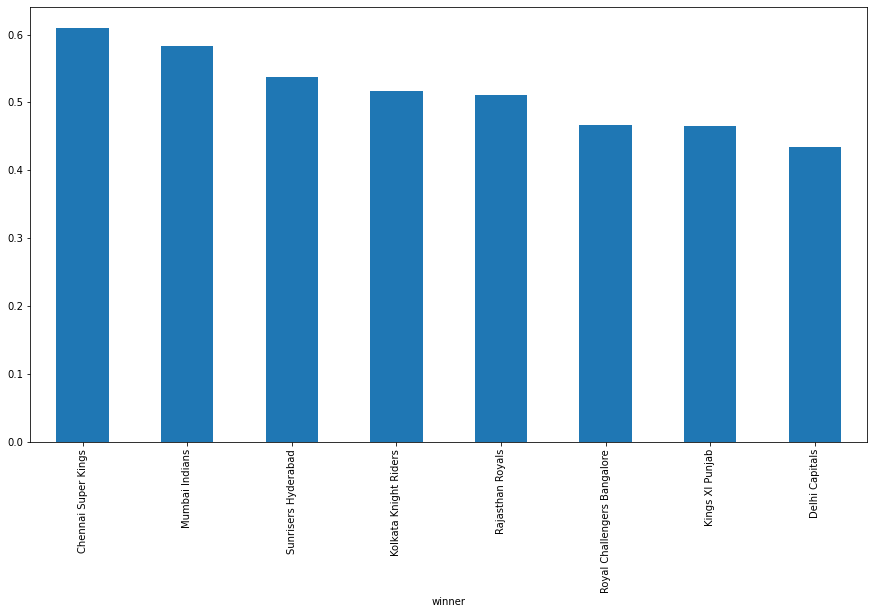

In [95]:

total_matches1=dfm.groupby(['team1'])['team1'].count() 
total_matches2=dfm.groupby(['team2'])['team2'].count()
tot_matches=total_matches1+total_matches2


total_wins=dfm.groupby(['winner'])['winner'].count()

avg_wins=total_wins/tot_matches
avg_wins.sort_values(ascending=False).drop(index=['Deccan Chargers','Kochi Tuskers Kerala','Gujarat Lions',
                 'Rising Pune Supergiants','Pune Warriors'])
data=avg_wins.sort_values(ascending=False).drop(index=['Deccan Chargers','Kochi Tuskers Kerala','Gujarat Lions',
                 'Rising Pune Supergiants','Pune Warriors'])
data.plot(kind='bar')

update(data,'Avg_Wins')

#### CSK has the most win percentage followed by MI
#### But total wins are in following order : MI, CSK, KKR

### Wining match while winning toss.

,Total_Wins,Avg_Wins,Win_after_toss_win
Mumbai Indians,1.0,2.0,5.0
Kings XI Punjab,5.0,7.0,7.0
Chennai Super Kings,2.0,1.0,2.0
Royal Challengers Bangalore,4.0,6.0,6.0
Kolkata Knight Riders,3.0,4.0,1.0
Delhi Capitals,6.0,8.0,4.0
Rajasthan Royals,7.0,5.0,3.0
Sunrisers Hyderabad,8.0,3.0,8.0


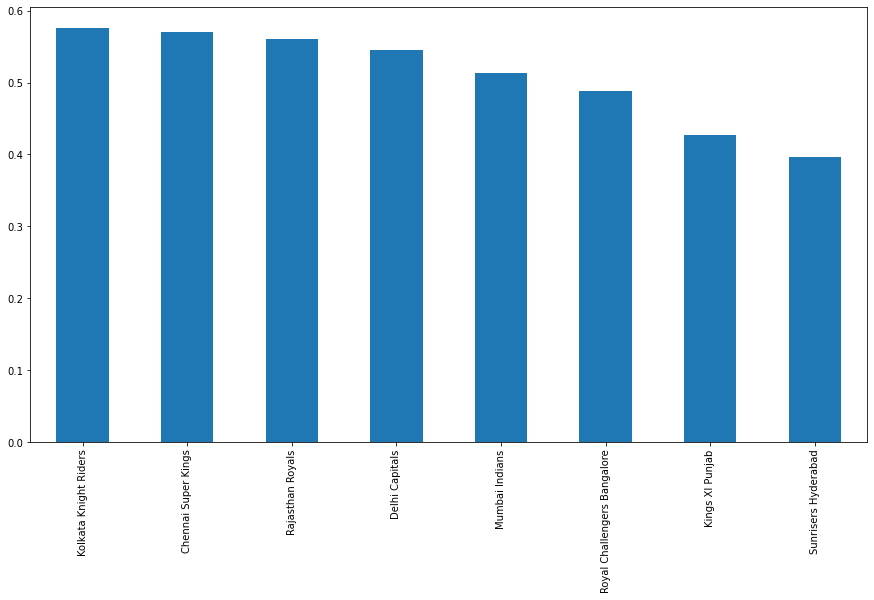

In [96]:
tw=dfm[dfm.toss_winner==dfm.winner]
win_tw=(tw.winner.value_counts()/dfm.winner.value_counts())
data=win_tw.sort_values(ascending=False).drop(index=['Deccan Chargers','Kochi Tuskers Kerala','Gujarat Lions',
                 'Rising Pune Supergiants','Pune Warriors'])
data.plot(kind='bar')

update(data,'Win_after_toss_win')
        

,Total_Wins,Avg_Wins,Win_after_toss_win,Win_after_toss_loss
Mumbai Indians,1.0,2.0,5.0,4.0
Kings XI Punjab,5.0,7.0,7.0,2.0
Chennai Super Kings,2.0,1.0,2.0,7.0
Royal Challengers Bangalore,4.0,6.0,6.0,3.0
Kolkata Knight Riders,3.0,4.0,1.0,8.0
Delhi Capitals,6.0,8.0,4.0,5.0
Rajasthan Royals,7.0,5.0,3.0,6.0
Sunrisers Hyderabad,8.0,3.0,8.0,1.0


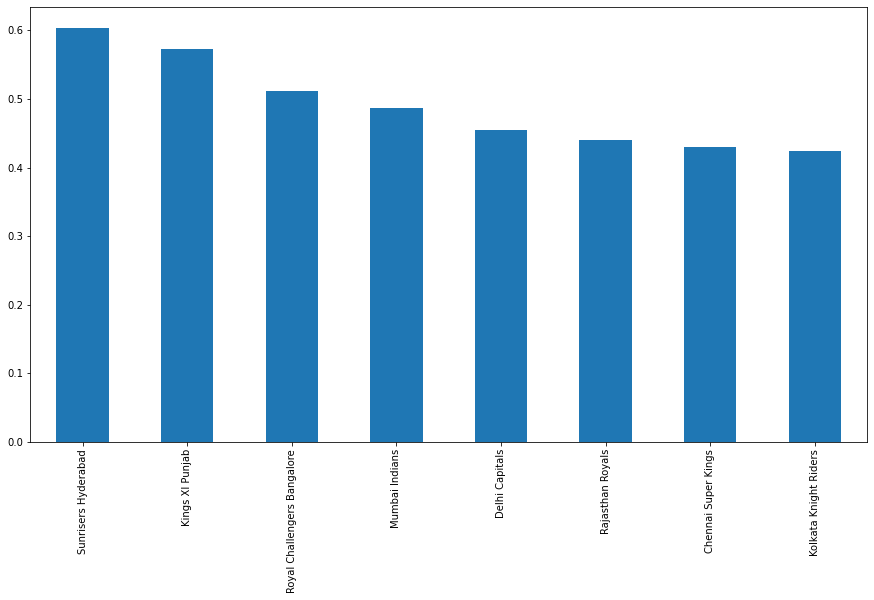

In [97]:
tnw=dfm[dfm.toss_winner!=dfm.winner]
win_tnw=(tnw.winner.value_counts()/dfm.winner.value_counts())
data=win_tnw.sort_values(ascending=False).drop(index=['Deccan Chargers','Kochi Tuskers Kerala','Gujarat Lions',
                 'Rising Pune Supergiants','Pune Warriors'])
data.plot(kind='bar')
update(data,'Win_after_toss_loss')

#### KKR, CSK and RR are teams are most probable to win the match after winning the toss.


#### SRH, KXIP,RCB are most probable to win after lossing the toss.

<AxesSubplot:>

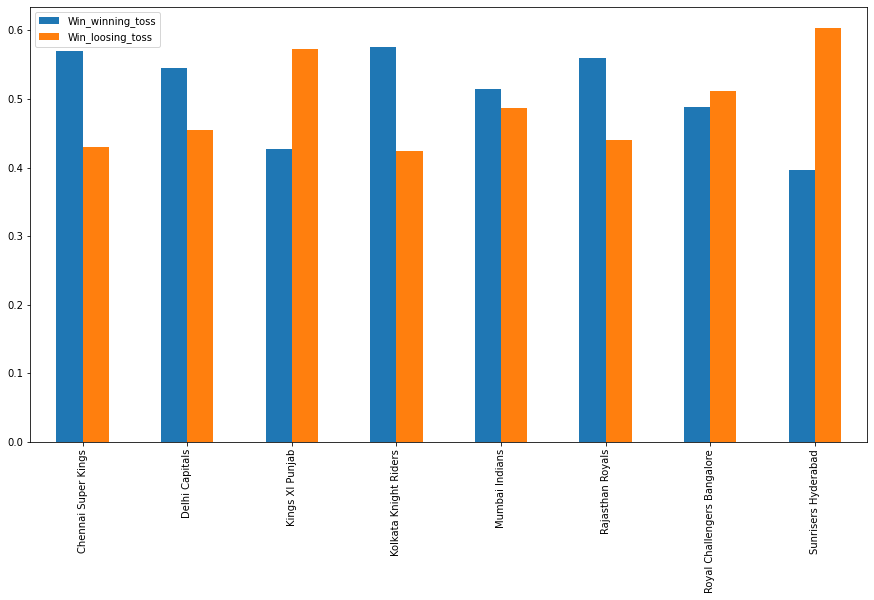

In [98]:
winc=pd.concat([win_tw,win_tnw],axis=1)
winc.columns=['Win_winning_toss','Win_loosing_toss']

winc.drop(index=['Deccan Chargers','Kochi Tuskers Kerala','Gujarat Lions',
                 'Rising Pune Supergiants','Pune Warriors']).plot(kind='bar')

#### This is stacked way to look into wins after loosing or winning toss.

### Winning while defending and chasing

In [99]:
bat1=dfm[(dfm.toss_winner==dfm.winner) & (dfm.toss_decision=='bat')]
bat2=dfm[(dfm.toss_winner!=dfm.winner) & (dfm.toss_decision=='field')]

bat_win=pd.concat([bat1,bat2],axis=0)

bowl1=dfm[(dfm.toss_winner==dfm.winner) & (dfm.toss_decision=='field')]
bowl2=dfm[(dfm.toss_winner!=dfm.winner) & (dfm.toss_decision=='bat')]

bowl_win=pd.concat([bowl1,bowl2],axis=0)

In [100]:
bat_win_avg=bat_win.winner.value_counts()/dfm.winner.value_counts()
bowl_win_avg=bowl_win.winner.value_counts()/dfm.winner.value_counts()



,Total_Wins,Avg_Wins,Win_after_toss_win,Win_after_toss_loss,Win_while_defending
Mumbai Indians,1.0,2.0,5.0,4.0,1.0
Kings XI Punjab,5.0,7.0,7.0,2.0,4.0
Chennai Super Kings,2.0,1.0,2.0,7.0,3.0
Royal Challengers Bangalore,4.0,6.0,6.0,3.0,5.0
Kolkata Knight Riders,3.0,4.0,1.0,8.0,7.0
Delhi Capitals,6.0,8.0,4.0,5.0,8.0
Rajasthan Royals,7.0,5.0,3.0,6.0,6.0
Sunrisers Hyderabad,8.0,3.0,8.0,1.0,2.0


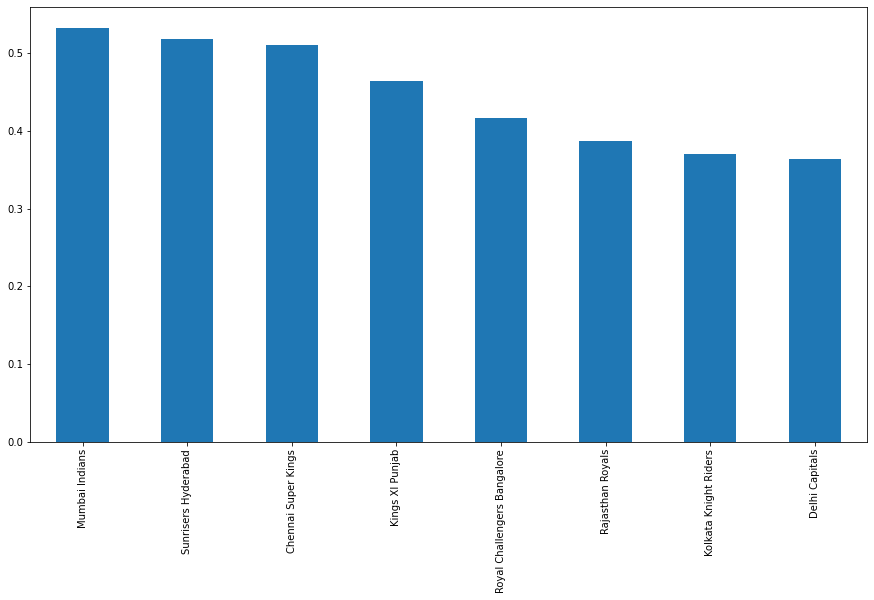

In [101]:
data=bat_win_avg.sort_values(ascending=False).drop(index=['Deccan Chargers','Kochi Tuskers Kerala','Gujarat Lions',
                 'Rising Pune Supergiants','Pune Warriors'])
data.plot(kind='bar')
update(data,'Win_while_defending')


#### MI and SRH are most successful teams while defending there target

,Total_Wins,Avg_Wins,Win_after_toss_win,Win_after_toss_loss,Win_while_defending,Win_while_chasing
Mumbai Indians,1.0,2.0,5.0,4.0,1.0,8.0
Kings XI Punjab,5.0,7.0,7.0,2.0,4.0,5.0
Chennai Super Kings,2.0,1.0,2.0,7.0,3.0,6.0
Royal Challengers Bangalore,4.0,6.0,6.0,3.0,5.0,4.0
Kolkata Knight Riders,3.0,4.0,1.0,8.0,7.0,2.0
Delhi Capitals,6.0,8.0,4.0,5.0,8.0,1.0
Rajasthan Royals,7.0,5.0,3.0,6.0,6.0,3.0
Sunrisers Hyderabad,8.0,3.0,8.0,1.0,2.0,7.0


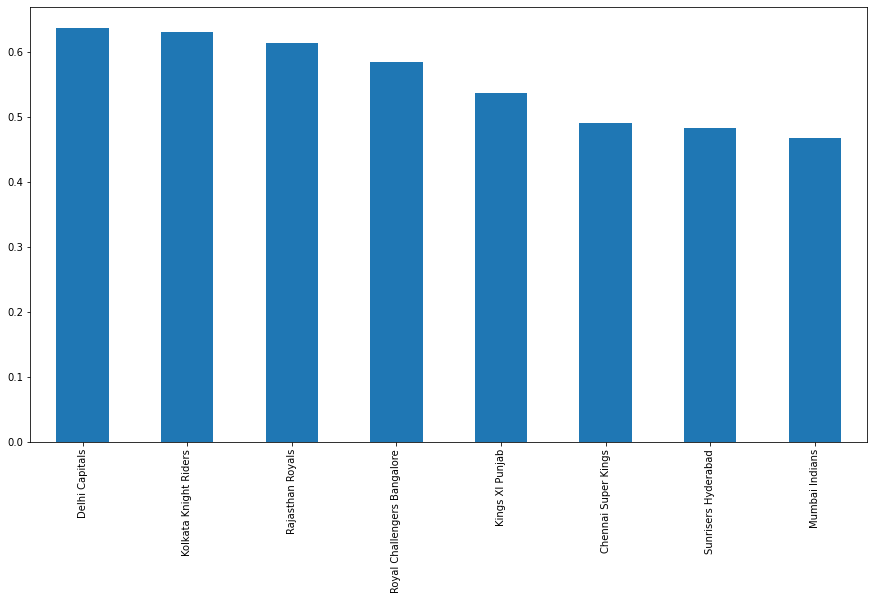

In [102]:
data=bowl_win_avg.sort_values(ascending=False).drop(index=['Deccan Chargers','Kochi Tuskers Kerala','Gujarat Lions',
                 'Rising Pune Supergiants','Pune Warriors'])
data.plot(kind='bar')

update(data,'Win_while_chasing')

#### DC and KKR are most succesful teams while chasing

<AxesSubplot:>

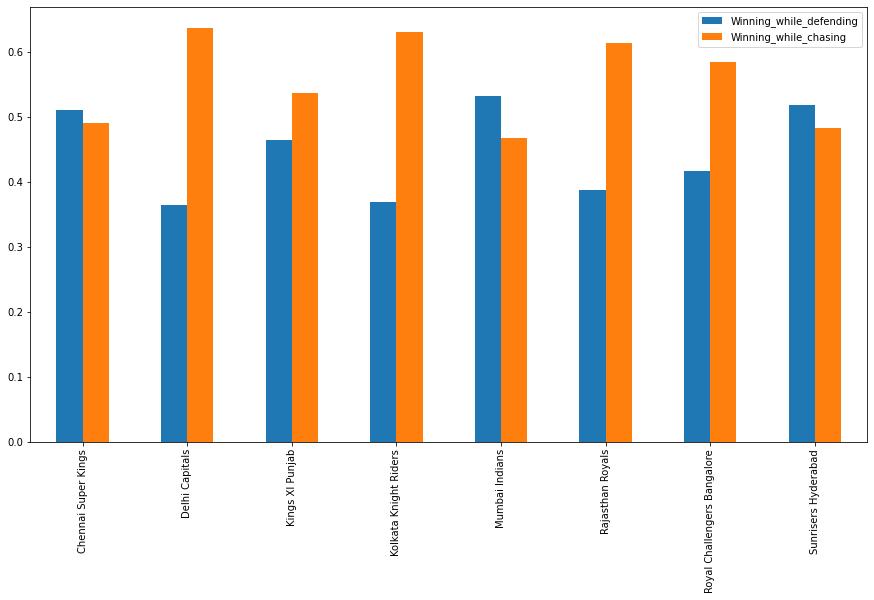

In [103]:
win_while_def_chas=pd.concat([bat_win_avg,bowl_win_avg],1)
win_while_def_chas.columns=['Winning_while_defending','Winning_while_chasing']
win_while_def_chas.drop(index=['Deccan Chargers','Kochi Tuskers Kerala','Gujarat Lions',
                 'Rising Pune Supergiants','Pune Warriors']).plot(kind='bar')

#### DC is the most succesful team while chasing
#### MI is most successful team while defending

### Successful player according to number of player_of_the_match wins

<AxesSubplot:>

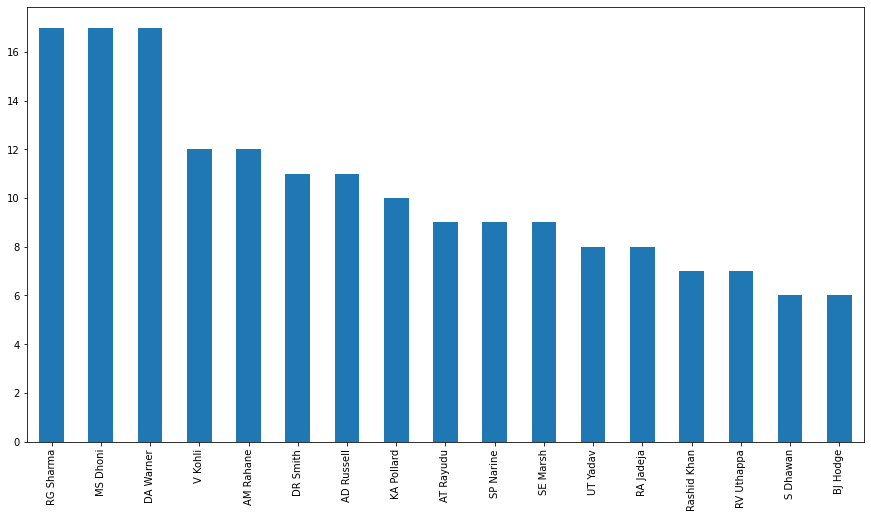

In [104]:
# Player of the match
ip=dfm.player_of_match.value_counts().head(30)
# Dropping retired player as they are not important to our analysis
ip.drop(['CH Gayle','YK Pathan','AB de Villiers','SR Watson','SK Raina','G Gambhir','MEK Hussey','A Mishra','V Sehwag','JH Kallis','Harbhajan Singh',
         'SR Tendulkar','AC Gilchrist']).plot(kind='bar')

#### DA Warner and Rohit Sharma are players having most player of the match award.


### Teams winning in their home ground.

<AxesSubplot:xlabel='venue,winner,winner'>

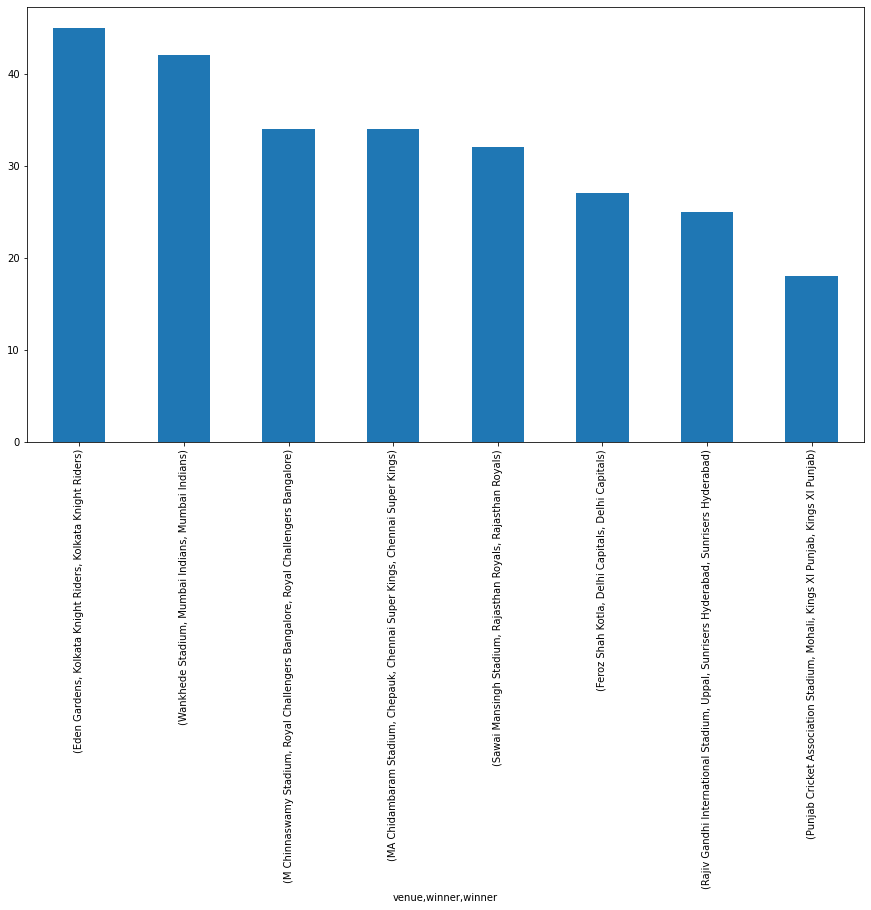

In [105]:
dfm.groupby(['venue','winner'])['winner'].value_counts().sort_values(ascending=False).head(8).plot(kind='bar')

#### KKR has won most matches at their home ground followed by MI.

### Most dominating team while winning by runs (during defend)

<AxesSubplot:xlabel='win_by_runs', ylabel='winner'>

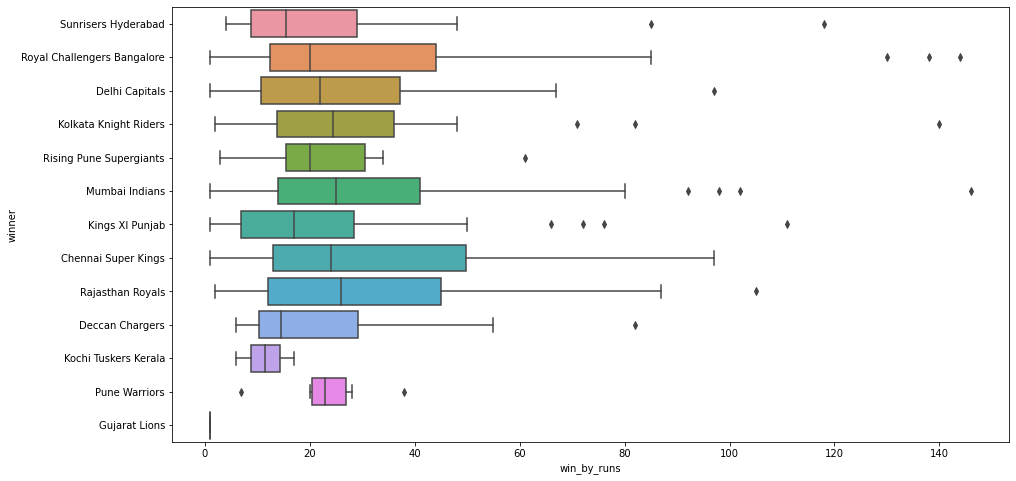

In [106]:
wbr=dfm[dfm.win_by_runs!=0]

sns.boxplot(y=wbr.winner,x=wbr.win_by_runs)


In [107]:
dfm.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue'],
      dtype='object')

In [108]:
#For updating data frame

data=wbr.groupby('winner')['win_by_runs'].median().drop(index=['Deccan Chargers','Kochi Tuskers Kerala','Gujarat Lions',
                 'Rising Pune Supergiants','Pune Warriors']).sort_values(ascending=False)
update(data,'Wins_by_runs')

,Total_Wins,Avg_Wins,Win_after_toss_win,Win_after_toss_loss,Win_while_defending,Win_while_chasing,Wins_by_runs
Mumbai Indians,1.0,2.0,5.0,4.0,1.0,8.0,2.0
Kings XI Punjab,5.0,7.0,7.0,2.0,4.0,5.0,7.0
Chennai Super Kings,2.0,1.0,2.0,7.0,3.0,6.0,4.0
Royal Challengers Bangalore,4.0,6.0,6.0,3.0,5.0,4.0,6.0
Kolkata Knight Riders,3.0,4.0,1.0,8.0,7.0,2.0,3.0
Delhi Capitals,6.0,8.0,4.0,5.0,8.0,1.0,5.0
Rajasthan Royals,7.0,5.0,3.0,6.0,6.0,3.0,1.0
Sunrisers Hyderabad,8.0,3.0,8.0,1.0,2.0,7.0,8.0


#### MI and RR are two dominant team while winning by runs

### Dominant teams while winning by wickets(during chase)

<AxesSubplot:xlabel='win_by_wickets', ylabel='winner'>

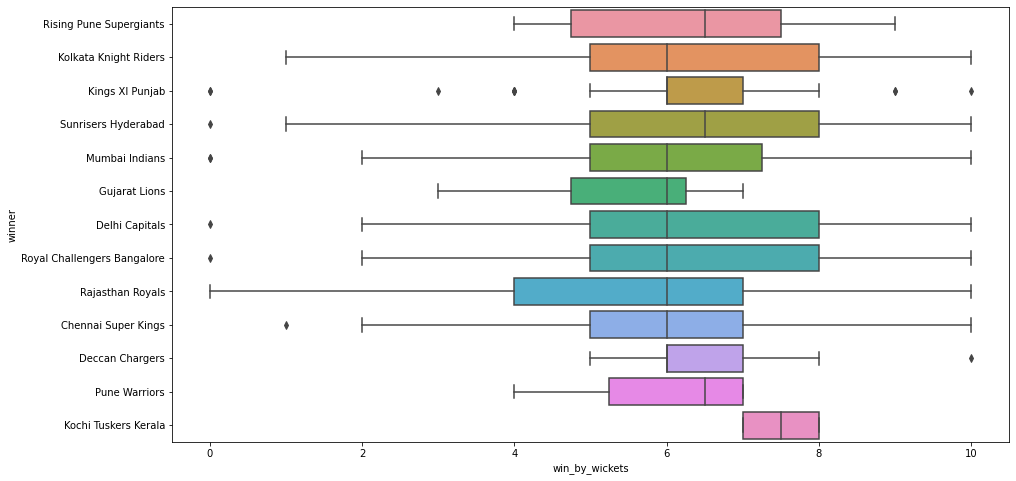

In [109]:
wbw=dfm[dfm.win_by_runs==0]

sns.boxplot(y=wbw.winner,x=wbw.win_by_wickets)


In [110]:
#### For updating dataframe
#### We are considering mode for analysis
import scipy.stats as stats
data=wbw.groupby('winner')['win_by_wickets'].agg(lambda x: stats.mode(x.values)[0]).drop(index=['Deccan Chargers','Kochi Tuskers Kerala','Gujarat Lions',
                 'Rising Pune Supergiants','Pune Warriors']).sort_values(ascending=False)

update(data,'Win_by_wickets')


,Total_Wins,Avg_Wins,Win_after_toss_win,Win_after_toss_loss,Win_while_defending,Win_while_chasing,Wins_by_runs,Win_by_wickets
Mumbai Indians,1.0,2.0,5.0,4.0,1.0,8.0,2.0,3.0
Kings XI Punjab,5.0,7.0,7.0,2.0,4.0,5.0,7.0,2.0
Chennai Super Kings,2.0,1.0,2.0,7.0,3.0,6.0,4.0,3.0
Royal Challengers Bangalore,4.0,6.0,6.0,3.0,5.0,4.0,6.0,3.0
Kolkata Knight Riders,3.0,4.0,1.0,8.0,7.0,2.0,3.0,2.0
Delhi Capitals,6.0,8.0,4.0,5.0,8.0,1.0,5.0,2.0
Rajasthan Royals,7.0,5.0,3.0,6.0,6.0,3.0,1.0,1.0
Sunrisers Hyderabad,8.0,3.0,8.0,1.0,2.0,7.0,8.0,3.0


#### From the current team in action RR is dominant team while winning by wickets having a mode value of 7.

## 2. Analysis in Deliveries Dataset

#### Before going further, lets merge "Matches" df with 'Deliveries' df



In [111]:
dfm.rename(columns={'id':'match_id'},inplace=True)
dft=pd.merge(dfd,dfm,on='match_id',how='left')
dft.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"


#### Lets create a dataframe that will contain score of each batsman in each match
#### In original datframe batsman_run is the run scores by each batsman without help of any extras.

In [112]:
bm_df=dft.groupby(['match_id','batsman'],as_index=False)['batsman_runs'].sum()
bm_df.head(2)

,match_id,batsman,batsman_runs
0,1,A Choudhary,6
1,1,BCJ Cutting,16


#### Lets filter out batman who has atleast played 10 matches

In [113]:
match_cnt=bm_df.groupby('batsman')['match_id'].count()
bm_=match_cnt[match_cnt>9].index

bt_df=bm_df[bm_df.batsman.isin(bm_)]

### Battting Average

Note: This average is average per match which is not the average actually calculated in cricket where a batsman when stayed not
out for a given match, then average is calculated by taking total runs till he gets out as single entity.

For that sort of analysis a deeper EDA is required.

<AxesSubplot:xlabel='batsman'>

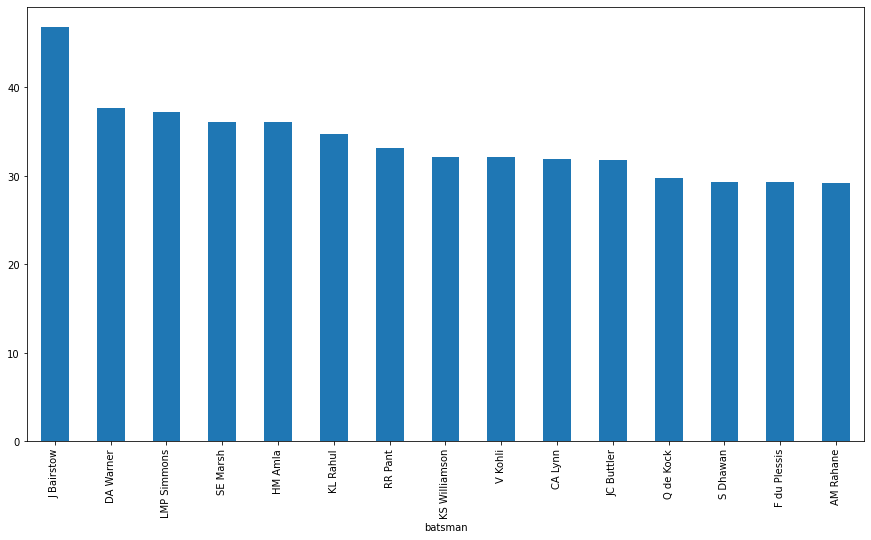

In [114]:
bt_df.groupby(['batsman'])['batsman_runs'].mean().sort_values(ascending=False).head(20).drop(['CH Gayle',
                                                                                                 'ML Hayden',
                                                                                                 'MEK Hussey',
                                                                                                 'SR Tendulkar',
                                                                                                 'AB de Villiers']).plot(kind=
                                                                                                                         'bar')


#### J bairstow, DA warner are batsman having best batting average per match.(Not traditional batting average)

### Best batting average in winning cause.

<AxesSubplot:xlabel='batsman'>

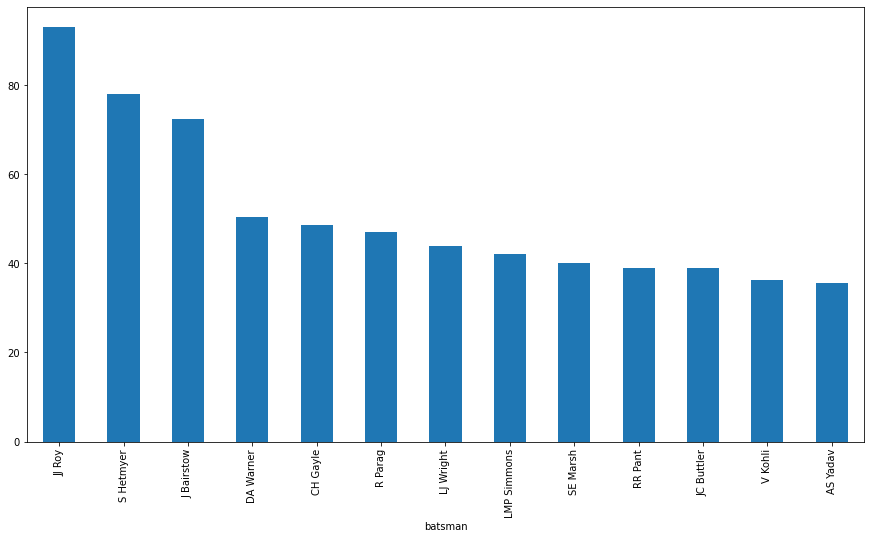

In [115]:
bat_win_cause=dft[dft.batting_team==dft.winner].groupby(['match_id','batsman'],as_index=False)['batsman_runs'].sum()


#Removing players not playing ipl anymore
bat_win_cause.groupby(['batsman'])['batsman_runs'].mean().sort_values(ascending=False).head(20).drop(['PD Collingwood',
                                                                                                     'MEK Hussey',
                                                                                                     'AB de Villiers',
                                                                                                     'KP Pietersen',
                                                                                                     'ML Hayden',
                                                                                                     'PC Valthaty',
                                                                                                    'GC Smith']).plot(kind='bar')

#### Jason Roy and Hetmeyer are two players having best batting average in winning cause.

### Bowling Average

#### Creating a bowler dataframe for bowling average calculations.

In [116]:
bl_df=dft.groupby(['match_id','bowler','over'],as_index=False)['total_runs'].sum()
# Lets create a df of bowlers who has bowled minimum of 50 overs

over_cnt=bl_df.groupby(['bowler'])['over'].count()
bowlers_=over_cnt[over_cnt>49].index

#lets filter out such bowlers from original df

act_bow=bl_df[bl_df.bowler.isin(bowlers_)]

<AxesSubplot:xlabel='bowler'>

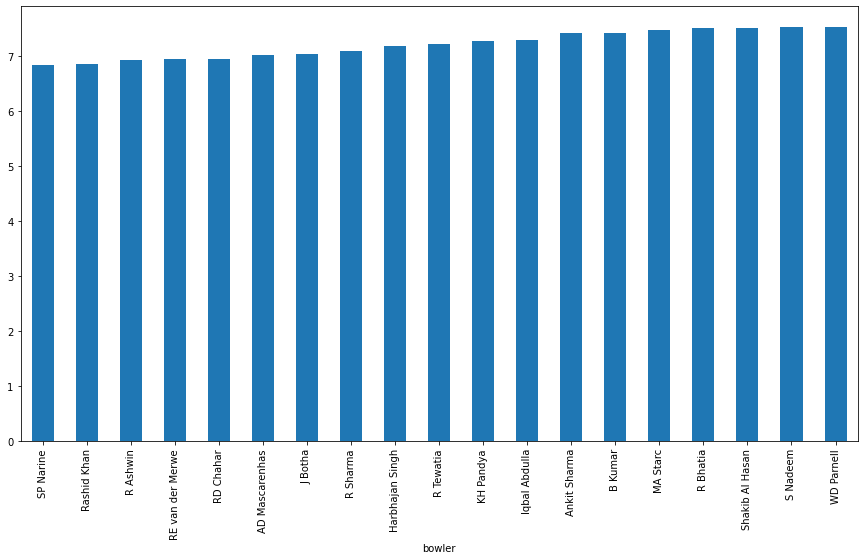

In [117]:
bl_avg=act_bow.groupby(['bowler'])['total_runs'].sum()/act_bow.groupby(['bowler'])['over'].count()

#Removing players those have retired or not playing ipl anymore and plotting
bl_avg.sort_values().head(35).drop(['A Kumble','GD McGrath','DL Vettori','M Muralitharan',
                                    'DW Steyn','SL Malinga','SK Warne','SK Raina','JP Duminy','DE Bollinger',
                                   'M Kartik','A Mishra','YK Pathan','DP Nannes','Yuvraj Singh','PP Ojha']).plot(kind='bar')

#### These are the bowler having least bowling average given that they have bowled atleast 50 overs and currently playing.

### Wickets for bowler

<AxesSubplot:xlabel='bowler'>

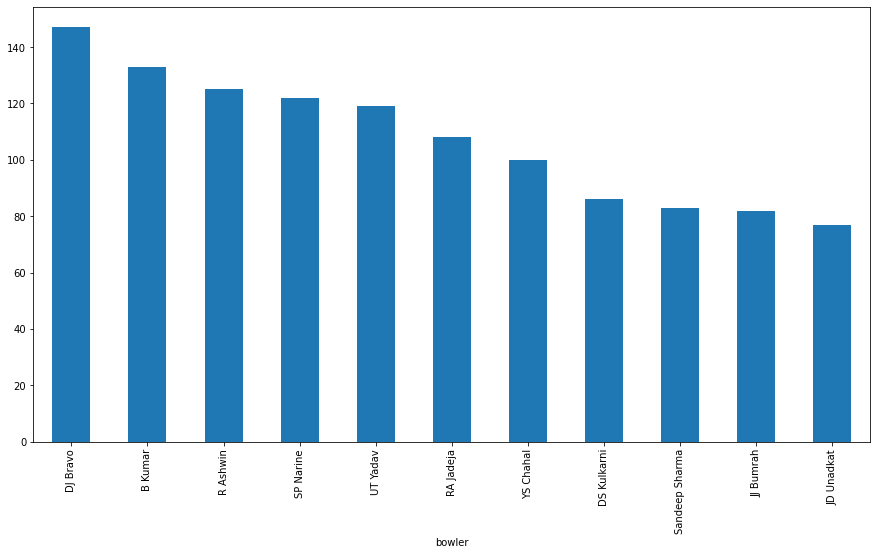

In [118]:
# Separating all the ball that a wicket fell which is not of 'run out','obstructing the field','retired hurt' kind
wkt_type=dft.dismissal_kind.value_counts().drop(['run out','obstructing the field','retired hurt']).index
wkt_balls=dft[dft.dismissal_kind.isin(wkt_type)]

#Removing players not playing ipl anymore and plotting
wkt_balls.groupby(['bowler'])['dismissal_kind'].count().sort_values(ascending
                                                                    =False).head(30).drop(['SL Malinga',
                                                                                          'A Mishra',
                                                                                          'Harbhajan Singh',
                                                                                          'PP Chawla','A Nehra',
                                                                                           'R Vinay Kumar',
                                                                                           'Z Khan',
                                                                                          'DW Steyn',
                                                                                          'SR Watson',
                                                                                          'MM Sharma',
                                                                                          'P Kumar',
                                                                                          'RP Singh',
                                                                                           'PP Ojha',
                                                                                          'JA Morkel',
                                                                                          'IK Pathan',
                                                                                          'M Morkel',
                                                                                          'Imran Tahir',
                                                                                          'L Balaji',
                                                                                          'MM Patel']).plot(kind='bar')

#### These are current playing players having most wickets in IPL

### Most wicket for year 2015 and beyond.

<AxesSubplot:xlabel='bowler'>

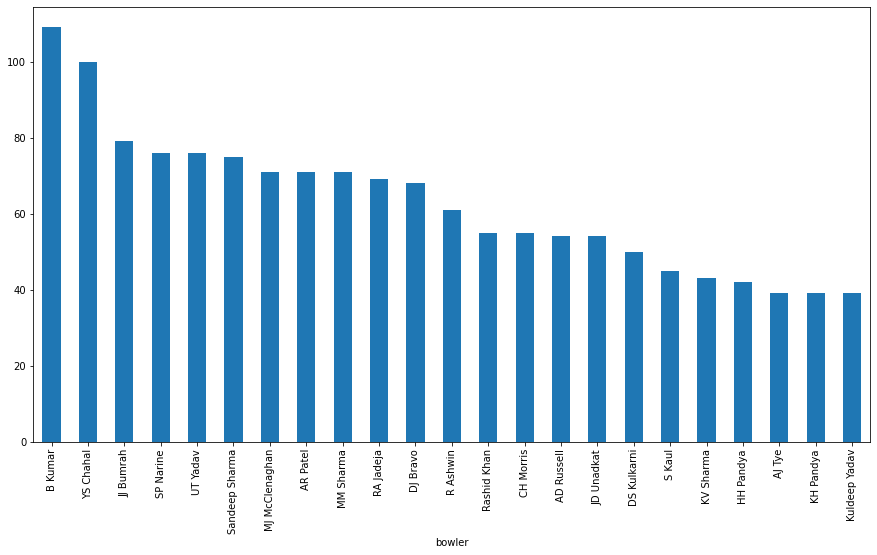

In [119]:
#As this contains too many legends who are not playing lets take a look at players wicket after 2015

rcnt_wckt_balls=wkt_balls[wkt_balls.date>'2014']
rcnt_wckt_balls.groupby(['bowler'])['dismissal_kind'].count().sort_values(ascending
                                                                    =False).head(30).drop(['Imran Tahir',
                                                                                           'Harbhajan Singh',
                                                                                          'SL Malinga',
                                                                                          'PP Chawla',
                                                                                          'A Mishra',
                                                                                          'A Nehra',
                                                                                           'SR Watson'
                                                                                          ]).plot(kind='bar')

#### These are most wicket takers in recent times

### Most wicket in winning cause in recent times.

<AxesSubplot:xlabel='bowler'>

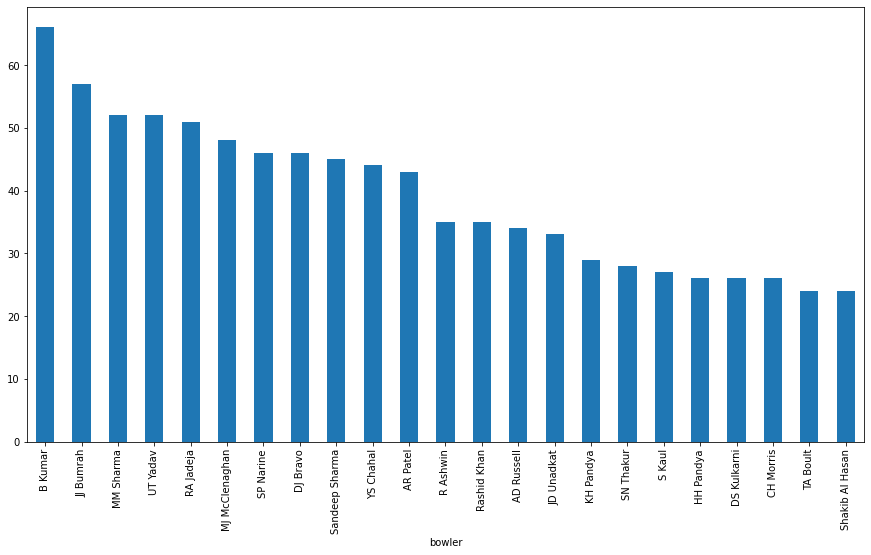

In [120]:

win_cause_wck=rcnt_wckt_balls[rcnt_wckt_balls.bowling_team==rcnt_wckt_balls.winner]
win_cause_wck.groupby(['bowler'])['dismissal_kind'].count().sort_values(ascending
                                                                    =False).head(30).drop(['Imran Tahir',
                                                                                           'Harbhajan Singh',
                                                                                          'SL Malinga',
                                                                                          'PP Chawla',
                                                                                          'A Mishra',
                                                                                          'A Nehra',
                                                                                           'SR Watson'
                                                                                          ]).plot(kind='bar')

#### These are most wicket takers resulting in win of their team.

## 3.Factors affecting win or loss

In [121]:
dft.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"


In [122]:
#Creating extra runs columns
dft['total_extra_runs']=dft.iloc[:,10:15].sum(axis=1)

# Creating a dataframe containing only losses for bowling team

df_loss=dft[dft.bowling_team!=dft.winner]
tot_match=df_loss.bowling_team.value_counts()
(df_loss.groupby('bowling_team')['total_extra_runs'].sum()/tot_match).sort_values(ascending=False).drop(index=['Deccan Chargers',
                                                                                                   'Kochi Tuskers Kerala',
                                                                                                   'Gujarat Lions',
                                                                                                'Rising Pune Supergiants',
                                                                                                   'Pune Warriors']).plot(kind='bar')
                 

<AxesSubplot:>

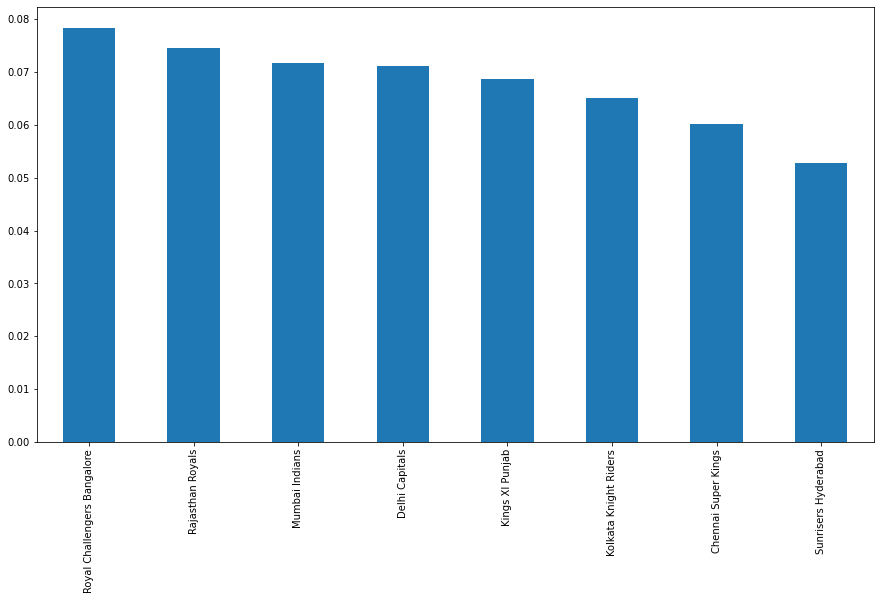

In [142]:
df_loss=dft[dft.bowling_team!=dft.winner]
tot_match=df_loss.bowling_team.value_counts()
(df_loss.groupby('bowling_team')['total_extra_runs'].sum()/tot_match).sort_values(ascending=False).drop(index=['Deccan Chargers',
                                                                                                   'Kochi Tuskers Kerala',
                                                                                                   'Gujarat Lions',
                                                                                                'Rising Pune Supergiants',
                                                                                                   'Pune Warriors']).plot(kind='bar')
                 

#### RCB and RR are teams which are most probable to loose if they give too much of extra runs.

In [180]:
#Creating a superover dataframe
dft_so=dft[(dft.match_id.isin(list(df_so.match_id.unique()))) & (dft.inning.isin((3,4)))]

#Creating dataframe containung only following columns
rdf=dft_so[['match_id','batting_team','bowling_team','winner']]

#Filtering df to get accurate idea of team batting first or second
cdf=rdf[rdf.duplicated()==False]

#Finally getting the required df
rdf=cdf[cdf.match_id.duplicated()==False]

odds=rdf[rdf.batting_team==rdf.winner].shape[0]/rdf[rdf.batting_team!=rdf.winner].shape[0]

print('Odds of winning a superover while batting first',round(odds,2))

Odds of winning a superover while batting first 1.33


#### Odds of winning a superover while batting first is 1.33 i.e. 4/3

# Summary

## 1. Summary for teams

#### Calculating a final rank from rank_df that we updated step wise.
#### Team obtaining lowest sum of ranks is the best team

In [54]:
final_rank=pd.DataFrame(rank_df.sum(axis=1).rank(method='min').sort_values(),columns=['Total_Rank'])
rank_df['Final_Rank']=final_rank
rank_df.sort_values(by='Final_Rank')

,Total_Wins,Avg_Wins,Win_after_toss_win,Win_after_toss_loss,Win_while_defending,Win_while_chasing,Wins_by_runs,Win_by_wickets,Final_Rank
Mumbai Indians,1.0,2.0,5.0,4.0,1.0,8.0,2.0,3.0,1.0
Chennai Super Kings,2.0,1.0,2.0,7.0,3.0,6.0,4.0,3.0,2.0
Kolkata Knight Riders,3.0,4.0,1.0,8.0,7.0,2.0,3.0,2.0,3.0
Rajasthan Royals,7.0,5.0,3.0,6.0,6.0,3.0,1.0,1.0,4.0
Royal Challengers Bangalore,4.0,6.0,6.0,3.0,5.0,4.0,6.0,3.0,5.0
Kings XI Punjab,5.0,7.0,7.0,2.0,4.0,5.0,7.0,2.0,6.0
Delhi Capitals,6.0,8.0,4.0,5.0,8.0,1.0,5.0,2.0,6.0
Sunrisers Hyderabad,8.0,3.0,8.0,1.0,2.0,7.0,8.0,3.0,8.0


#### 1. It's better to decide with the ranking before going for advertisement with above teams.
#### 2. The fan base of such teams are found to be in given order
####        [CSK    MI    RCB]


#### 3. These 3 teams constitute 75% of total fan base(sorce: cricketaddictor.com)
#### 4. Final decision should be taken considering other factors which we cant control.

### Actions

#### We can directly go for CSK shirt sponsorship
#### We can also segregate smaller kiit sponsorships e.g helmet, sleeve sponsor for these three teams for larger viewership.

### 2. Summary about players.

#### 1. We can go for bat sponsorship for Hetmeyer,RR Pant as these two represent foreign and Indian player having best 
#### batting average in winning cause.

#### 2. In recent times, the list of bowlers is given below for which there post in instagram can be sponsored by us.
#### [B Kumar,YJ Chahal,RA Jadeja,SP Narine]

### 3. Factors to look out for

#### 1. If RCB gives too much of extra runs, team is most probable to loose.
#### 2. Odds of team winning a superover while batting first is 1.33 times batting second.